# Principal Component Analysis (PCA) and Multidimensional Scaling (MDS)

In this notebook, we will learn similarities and differences between PCA and MDS and compute both of them from scratch.

## PCA for population genetics
PCA is a matrix factorization (eigen value decomposition) problem that attempts to project the data into a low dimensional space that explains the largest amount of variance in the data. The motivation is that, if the data is high-dimensional, many features (axes) can be redundant, therefore one can reduce the number of dimensions and make the statistical analysis more robust in this way. Graphically, PCA can be viewed as rotation and shift of coordinate system where the original 2D data with XY-coordinates are replaced by e.g. 1D data as PC1 which keeps most of the variation in the data. Note, that some information can be lost in this way, however, it can be statistically very benificial to work with lower-dimensional data.

![idea of PCA](assets/pca_rotation.png)

In population genetics, we typically work with genetic variation (genotype) data encoded as 0, 1 and 2 by the number of minor allele carrier in the sample. Let us generate a toy genotype matrix for 5 individuals and 7 genetic variants.

In [1]:
gen <- t(matrix(c(1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0), 5, by = TRUE))
colnames(gen) <- paste0("Ind", 1:5)
rownames(gen) <- paste0("SNP", 1:7)
print(gen)

     Ind1 Ind2 Ind3 Ind4 Ind5
SNP1    1    1    1    0    0
SNP2    0    1    2    1    2
SNP3    2    1    1    0    1
SNP4    0    0    1    2    2
SNP5    2    1    1    0    0
SNP6    0    0    1    1    1
SNP7    2    2    1    1    0


Now we are going to compute PCA from scratch in R. The PCA algorithm includes three steps:

* mean centering the data
* computing variance-covariance matrix
* performing eigen value decomposition on the variance-covariance matrix

Below, we will implement the three steps with repsect to the genotype matrix, and display the fraction of variance explained by each principal component.

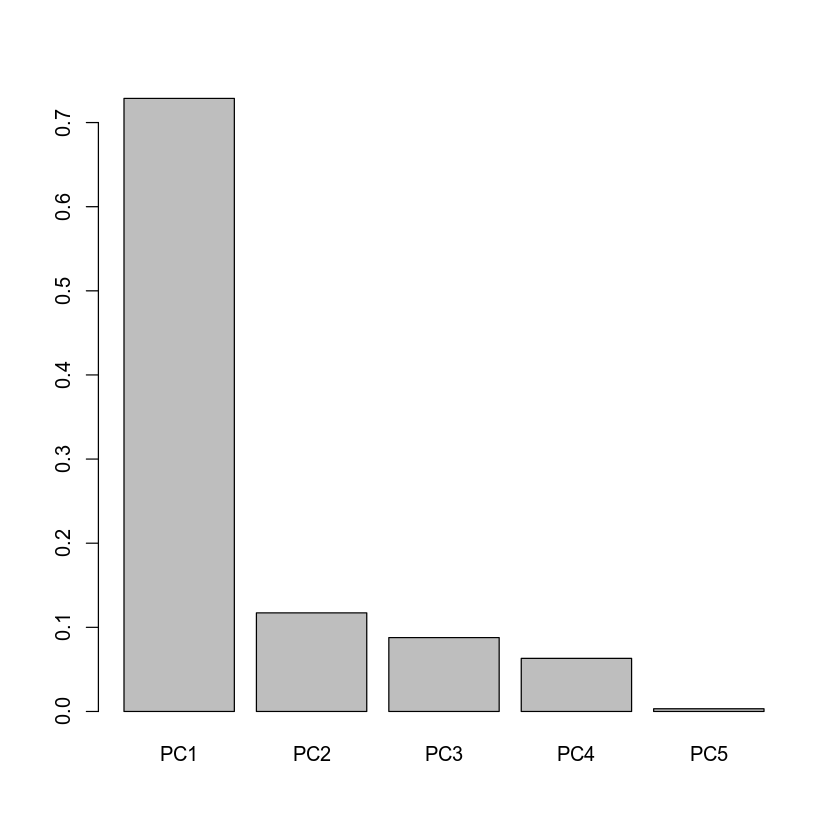

In [2]:
gen_centered <- scale(gen, center = TRUE, scale = FALSE) # mean centering
covariance <- t(gen_centered) %*% gen_centered # computing variance-covariance matrix
eig <- eigen(covariance) # performing eigen value decomposition of the variance-covariance matrix

barplot(eig$values / sum(eig$values), names = paste0("PC", 1:5))

From the barplot above we can conclude that PC1 explains most of the variation (approximately 70%) in the genotype data, while the other PCs explain limited amount of variation, therefore one can say that our original 7-dimensional data is essentially 1-dimensional, or can be approximated with only **one dimension** with good accuracy. In this way we **dramatically reduced dimensionality of the data** from seven to one. Finally, let us visualize the 5 generated samples in two-dimensional space, i.e. using the leading PC1 and PC2 variables.

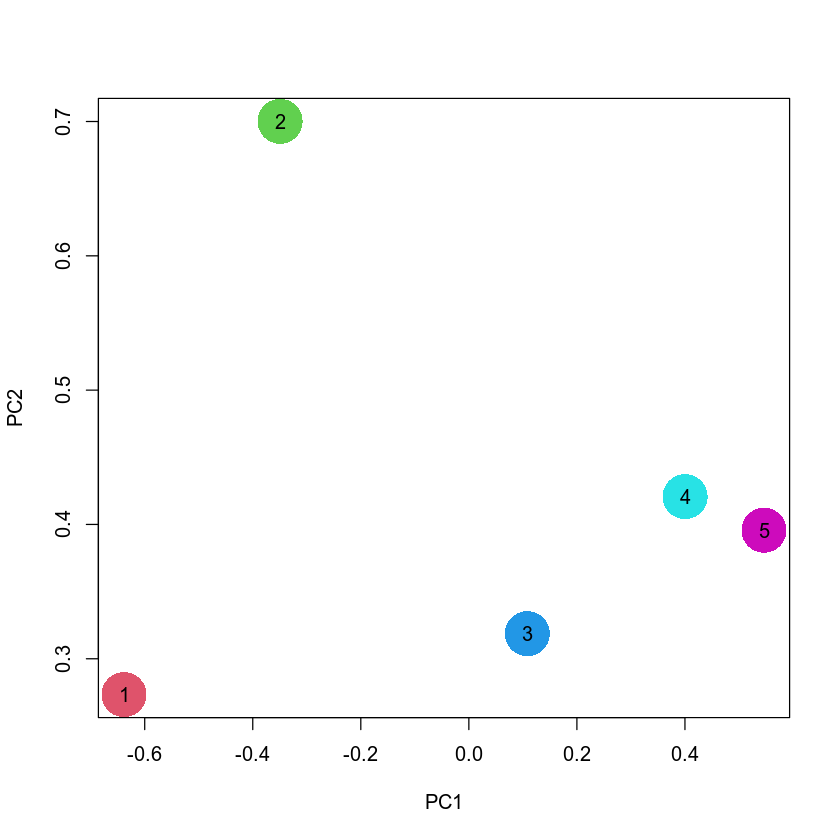

In [3]:
plot(eig$vectors[, 1:2], xlab = "PC1", ylab = "PC2", pch = 16, cex = 5, col = 2:6)
points(eig$vectors[, 1:2], pch = as.character(1:5))

## MDS for population genetics
Multidimensional Scaling (MDS) is very closely related to PCA and sometimes used as a synonim. The idea of MDS is to project the data into a low dimensional space and preserve pairwise distances between data points as much as possible. Under the hood this is done by solving eigen value decomposition problem for a matrix of paiwise distances. Compare with PCA, where we did eigen value decomposition of a variance-covariance matrix, the latter can be sometimes viewed as a pairwise distance matrix. This is how MDS is related to PCA. Both do eigen value decomposition of some sort of matrix of pairwise distances. Note, some implementation of MDS do not perform eigen value decomposition but instead do a gradient descent minimization of **euclidean distance between the original data and an approximation as a product of two matrices (loadings and scores)**. This represents an alternative, machine learning style of matrix factorization.

![machine learning idea of MDS](assets/mds.png)

Below, we will use the same genotype matrix as for PCA, and compute Manhattan distances between all pairs of data points, which is the sum of absolute values of pairwise genotype differences.

In [4]:
gen <- t(matrix(c(1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
    0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0), 5, by = TRUE))
colnames(gen) <- paste0("Ind", 1:5)
rownames(gen) <- paste0("SNP", 1:7)
print(gen)

     Ind1 Ind2 Ind3 Ind4 Ind5
SNP1    1    1    1    0    0
SNP2    0    1    2    1    2
SNP3    2    1    1    0    1
SNP4    0    0    1    2    2
SNP5    2    1    1    0    0
SNP6    0    0    1    1    1
SNP7    2    2    1    1    0


In [5]:
my_dist <- dist(t(gen), method = "manhattan", upper = TRUE, diag = TRUE)
my_dist

     Ind1 Ind2 Ind3 Ind4 Ind5
Ind1    0    3    7   10   11
Ind2    3    0    4    7    8
Ind3    7    4    0    5    4
Ind4   10    7    5    0    3
Ind5   11    8    4    3    0

Here, we can see that the Manhattan distance between for example individuals one and two is equal to 3 because there are three genotype differences at SNP2, SNP3 and SNP5. Now, we will use the **cmdscale** function in R that performs the classic / metric MDS. Under the hood this function does an eigen value decomposition of the matrix of pairwise Manhattan distances.

In [6]:
my_mds <- cmdscale(my_dist)
my_mds

Ind1,-6.114866,0.2977272
Ind2,-3.077094,0.2402932
Ind3,0.621230,-1.7944048
Ind4,3.723118,2.1483083
Ind5,4.847612,-0.8919238


Please take a look at the first latent variable in **my_mds**. Interestengly, if you look at the absolute value of the difference between e.g. individuals 1 and 2, it will be close to 3, between individuals 1 and 3 will be nearly 7 etc. This corresponds to the values in the pairwise Manhattan distances in the **my_dist** matrix above. Therefore, as it was emphasized previously, the point of MDS is to preserve pairwise distances while doing dimension reduction. Finally, let us visualize the 5 individuals in the MDS space and compare it with PCA.

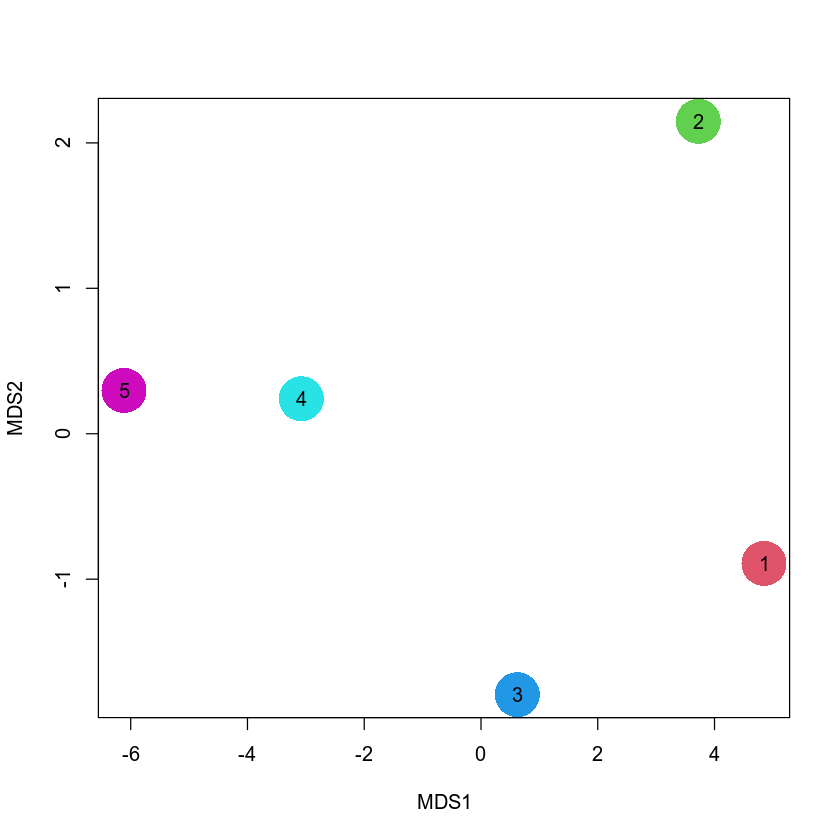

In [7]:
plot(my_mds, xlab = "MDS1", ylab = "MDS2", pch = 16, cex = 5, col = 6:2)
points(my_mds, pch = as.character(5:1))

Overall, this picture looks quite similar to the PCA plot above. This is not suprising since both PCA and MDS are based on very similar principles, and typically agree with each other for real-world datasets.